In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import subprocess
import os
import re
import sys
import time
from sklearn.preprocessing import LabelEncoder


% matplotlib inline
sns.set(style='whitegrid', color_codes=True)
sns.set(font_scale=1)

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)



In [2]:
print "Timestamp:"
print time.strftime(r'%Y-%m-%dT%H:%M:%S%Z', time.gmtime())
print "Versions:"
print "Python:", sys.version_info
print "numpy:", np.__version__
print "pandas:", pd.__version__

Timestamp:
2017-04-18T01:02:15EST
Versions:
Python: sys.version_info(major=2, minor=7, micro=12, releaselevel='final', serial=0)
numpy: 1.12.0
pandas: 0.18.1


In [3]:
from subprocess import check_output
print(check_output(["ls", "us_census_full"]).decode("utf-8"))

census_income_learn.csv
census_income_metadata.txt
census_income_test.csv



================================================

The following link lets you download an archive containing an “exercise” US Census dataset: http://thomasdata.s3.amazonaws.com/ds/us_census_full.zip
This US Census dataset contains detailed but anonymized information for approximately 300,000 people.
The archive contains 3 files: 

* A large learning .csv file
* Another test .csv file
* A metadata file describing the columns of the two above mentioned files (identical for both)

The goal of this exercise is to model the information contained in the last column (42nd), i.e., which people make more or less than $50,000 / year, from the information contained in the other columns. The exercise here consists of modeling a binary variable.
Work with R or Python to carry out the following steps:

* Import the learning and text files
* Based on the learning file:
* Make a quick statistic based and univariate audit of the different columns’ content and produce the results in visual / graphic format. This audit should describe the variable distribution, the % of missing values, the extreme values, and so on. 
* Create a model using these variables (you can use whichever variables you want, or even create you own; for example, you could find the ratio or relationship between different variables, the one-hot encoding of “categorical” variables, etc.) to model winning more or less than $50,000 / year. Here, the idea would be for you to test one or two algorithms, such as logistic regression, or a decision tree. Feel free to choose others if wish. 
* Choose the model that appears to have the highest performance based on a comparison between reality (the 42nd variable) and the model’s prediction. 
* Apply your model to the test file and measure it’s real performance on it (same method as above).
The goal of this exercise is not to create the best or the purest model, but rather to describe the steps you took to accomplish it.

Explain areas that may have been the most challenging for you.
Find clear insights on the profiles of the people that make more than $50,000 / year. For example, which variables seem to be the most correlated with this phenomenon?
Finally, you push your code on GitHub to share it with me, or send it via email.
Once again, the goal of this exercise is not to solve this problem, but rather to spend a few hours on it and to thoroughly explain your approach.



# Name Columns

In [4]:
columns_raw = '''age: continuous.
class of worker: Not in universe, Federal government, Local government, Never worked, Private, Self-employed-incorporated, Self-employed-not incorporated, State government, Without pay.
detailed industry recode: 0, 40, 44, 2, 43, 47, 48, 1, 11, 19, 24, 25, 32, 33, 34, 35, 36, 37, 38, 39, 4, 42, 45, 5, 15, 16, 22, 29, 31, 50, 14, 17, 18, 28, 3, 30, 41, 46, 51, 12, 13, 21, 23, 26, 6, 7, 9, 49, 27, 8, 10, 20.
detailed occupation recode: 0, 12, 31, 44, 19, 32, 10, 23, 26, 28, 29, 42, 40, 34, 14, 36, 38, 2, 20, 25, 37, 41, 27, 24, 30, 43, 33, 16, 45, 17, 35, 22, 18, 39, 3, 15, 13, 46, 8, 21, 9, 4, 6, 5, 1, 11, 7.
education: Children, 7th and 8th grade, 9th grade, 10th grade, High school graduate, 11th grade, 12th grade no diploma, 5th or 6th grade, Less than 1st grade, Bachelors degree(BA AB BS), 1st 2nd 3rd or 4th grade, Some college but no degree, Masters degree(MA MS MEng MEd MSW MBA), Associates degree-occup /vocational, Associates degree-academic program, Doctorate degree(PhD EdD), Prof school degree (MD DDS DVM LLB JD).
wage per hour: continuous.
enroll in edu inst last wk: Not in universe, High school, College or university.
marital stat: Never married, Married-civilian spouse present, Married-spouse absent, Separated, Divorced, Widowed, Married-A F spouse present.
major industry code: Not in universe or children, Entertainment, Social services, Agriculture, Education, Public administration, Manufacturing-durable goods, Manufacturing-nondurable goods, Wholesale trade, Retail trade, Finance insurance and real estate, Private household services, Business and repair services, Personal services except private HH, Construction, Medical except hospital, Other professional services, Transportation, Utilities and sanitary services, Mining, Communications, Hospital services, Forestry and fisheries, Armed Forces.
major occupation code: Not in universe, Professional specialty, Other service, Farming forestry and fishing, Sales, Adm support including clerical, Protective services, Handlers equip cleaners etc , Precision production craft & repair, Technicians and related support, Machine operators assmblrs & inspctrs, Transportation and material moving, Executive admin and managerial, Private household services, Armed Forces.
race: White, Black, Other, Amer Indian Aleut or Eskimo, Asian or Pacific Islander.
hispanic origin: Mexican (Mexicano), Mexican-American, Puerto Rican, Central or South American, All other, Other Spanish, Chicano, Cuban, Do not know, NA.
sex: Female, Male.
member of a labor union: Not in universe, No, Yes.
reason for unemployment: Not in universe, Re-entrant, Job loser - on layoff, New entrant, Job leaver, Other job loser.
full or part time employment stat: Children or Armed Forces, Full-time schedules, Unemployed part- time, Not in labor force, Unemployed full-time, PT for non-econ reasons usually FT, PT for econ reasons usually PT, PT for econ reasons usually FT.
capital gains: continuous.
capital losses: continuous.
dividends from stocks: continuous.
tax filer stat: Nonfiler, Joint one under 65 & one 65+, Joint both under 65, Single, Head of household, Joint both 65+.
region of previous residence: Not in universe, South, Northeast, West, Midwest, Abroad.
state of previous residence: Not in universe, Utah, Michigan, North Carolina, North Dakota, Virginia, Vermont, Wyoming, West Virginia, Pennsylvania, Abroad, Oregon, California, Iowa, Florida, Arkansas, Texas, South Carolina, Arizona, Indiana, Tennessee, Maine, Alaska, Ohio, Montana, Nebraska, Mississippi, District of Columbia, Minnesota, Illinois, Kentucky, Delaware, Colorado, Maryland, Wisconsin, New Hampshire, Nevada, New York, Georgia, Oklahoma, New Mexico, South Dakota, Missouri, Kansas, Connecticut, Louisiana, Alabama, Massachusetts, Idaho, New Jersey.
detailed household and family stat: Child <18 never marr not in subfamily, Other Rel <18 never marr child of subfamily RP, Other Rel <18 never marr not in subfamily, Grandchild <18 never marr child of subfamily RP, Grandchild <18 never marr not in subfamily, Secondary individual, In group quarters, Child under 18 of RP of unrel subfamily, RP of unrelated subfamily, Spouse of householder, Householder, Other Rel <18 never married RP of subfamily, Grandchild <18 never marr RP of subfamily, Child <18 never marr RP of subfamily, Child <18 ever marr not in subfamily, Other Rel <18 ever marr RP of subfamily, Child <18 ever marr RP of subfamily, Nonfamily householder, Child <18 spouse of subfamily RP, Other Rel <18 spouse of subfamily RP, Other Rel <18 ever marr not in subfamily, Grandchild <18 ever marr not in subfamily, Child 18+ never marr Not in a subfamily, Grandchild 18+ never marr not in subfamily, Child 18+ ever marr RP of subfamily, Other Rel 18+ never marr not in subfamily, Child 18+ never marr RP of subfamily, Other Rel 18+ ever marr RP of subfamily, Other Rel 18+ never marr RP of subfamily, Other Rel 18+ spouse of subfamily RP, Other Rel 18+ ever marr not in subfamily, Child 18+ ever marr Not in a subfamily, Grandchild 18+ ever marr not in subfamily, Child 18+ spouse of subfamily RP, Spouse of RP of unrelated subfamily, Grandchild 18+ ever marr RP of subfamily, Grandchild 18+ never marr RP of subfamily, Grandchild 18+ spouse of subfamily RP.
detailed household summary in household: Child under 18 never married, Other relative of householder, Nonrelative of householder, Spouse of householder, Householder, Child under 18 ever married, Group Quarters- Secondary individual, Child 18 or older.
| instance weight: ignore.
instance weight: continuous.
migration code-change in msa: Not in universe, Nonmover, MSA to MSA, NonMSA to nonMSA, MSA to nonMSA, NonMSA to MSA, Abroad to MSA, Not identifiable, Abroad to nonMSA.
migration code-change in reg: Not in universe, Nonmover, Same county, Different county same state, Different state same division, Abroad, Different region, Different division same region.
migration code-move within reg: Not in universe, Nonmover, Same county, Different county same state, Different state in West, Abroad, Different state in Midwest, Different state in South, Different state in Northeast.
live in this house 1 year ago: Not in universe under 1 year old, Yes, No.
migration prev res in sunbelt: Not in universe, Yes, No.
num persons worked for employer: continuous.
family members under 18: Both parents present, Neither parent present, Mother only present, Father only present, Not in universe.
country of birth father: Mexico, United-States, Puerto-Rico, Dominican-Republic, Jamaica, Cuba, Portugal, Nicaragua, Peru, Ecuador, Guatemala, Philippines, Canada, Columbia, El-Salvador, Japan, England, Trinadad&Tobago, Honduras, Germany, Taiwan, Outlying-U S (Guam USVI etc), India, Vietnam, China, Hong Kong, Cambodia, France, Laos, Haiti, South Korea, Iran, Greece, Italy, Poland, Thailand, Yugoslavia, Holand-Netherlands, Ireland, Scotland, Hungary, Panama.
country of birth mother: India, Mexico, United-States, Puerto-Rico, Dominican-Republic, England, Honduras, Peru, Guatemala, Columbia, El-Salvador, Philippines, France, Ecuador, Nicaragua, Cuba, Outlying-U S (Guam USVI etc), Jamaica, South Korea, China, Germany, Yugoslavia, Canada, Vietnam, Japan, Cambodia, Ireland, Laos, Haiti, Portugal, Taiwan, Holand-Netherlands, Greece, Italy, Poland, Thailand, Trinadad&Tobago, Hungary, Panama, Hong Kong, Scotland, Iran.
country of birth self: United-States, Mexico, Puerto-Rico, Peru, Canada, South Korea, India, Japan, Haiti, El-Salvador, Dominican-Republic, Portugal, Columbia, England, Thailand, Cuba, Laos, Panama, China, Germany, Vietnam, Italy, Honduras, Outlying-U S (Guam USVI etc), Hungary, Philippines, Poland, Ecuador, Iran, Guatemala, Holand-Netherlands, Taiwan, Nicaragua, France, Jamaica, Scotland, Yugoslavia, Hong Kong, Trinadad&Tobago, Greece, Cambodia, Ireland.
citizenship: Native- Born in the United States, Foreign born- Not a citizen of U S , Native- Born in Puerto Rico or U S Outlying, Native- Born abroad of American Parent(s), Foreign born- U S citizen by naturalization.
own business or self employed: 0, 2, 1.
fill inc questionnaire for veteran's admin: Not in universe, Yes, No.
veterans benefits: 0, 2, 1.
weeks worked in year: continuous.
year: 94, 95.'''

In [5]:
columns = [x.replace(' ', '_')  for x in [line.split(':')[0] for line in columns_raw.split('\n')] if x[0] != '|']
columns += ['income_level']
columns

['age',
 'class_of_worker',
 'detailed_industry_recode',
 'detailed_occupation_recode',
 'education',
 'wage_per_hour',
 'enroll_in_edu_inst_last_wk',
 'marital_stat',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'hispanic_origin',
 'sex',
 'member_of_a_labor_union',
 'reason_for_unemployment',
 'full_or_part_time_employment_stat',
 'capital_gains',
 'capital_losses',
 'dividends_from_stocks',
 'tax_filer_stat',
 'region_of_previous_residence',
 'state_of_previous_residence',
 'detailed_household_and_family_stat',
 'detailed_household_summary_in_household',
 'instance_weight',
 'migration_code-change_in_msa',
 'migration_code-change_in_reg',
 'migration_code-move_within_reg',
 'live_in_this_house_1_year_ago',
 'migration_prev_res_in_sunbelt',
 'num_persons_worked_for_employer',
 'family_members_under_18',
 'country_of_birth_father',
 'country_of_birth_mother',
 'country_of_birth_self',
 'citizenship',
 'own_business_or_self_employed',
 "fill_inc_questionnaire_for_veteran

In [6]:
# Import the learning and text files
census_income_train = pd.read_csv('us_census_full/census_income_learn.csv', header=None, names = columns)
census_income_test = pd.read_csv('us_census_full/census_income_test.csv', header=None, names = columns)

print '[INFO] the size of training dataset: %s' % str(census_income_train.shape)
print '[INFO] the size of testing dataset: %s' % str(census_income_test.shape)

census_income_test.head()

[INFO] the size of training dataset: (199523, 42)
[INFO] the size of testing dataset: (99762, 42)


,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


In [8]:
# census_income_train.to_csv('data/census_train.csv', index=False)
# census_income_test.to_csv('data/census_test.csv', index=False)

## Quick look at feature importance & data summary

In [9]:
cat_train = census_income_train.copy()
le_col = LabelEncoder()
cat_train[['income_level']] = le_col.fit_transform(cat_train[['income_level']])

In [8]:
cat_train.head(2)

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0


In [10]:
# Summary categorical features
cat_census = census_income_train.describe(include = [object])#.iloc[:, 0:10]

# Get categorical features
cat_columns_names = cat_census.columns
cat_census

,class_of_worker,education,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,...,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,fill_inc_questionnaire_for_veteran's_admin,income_level
count,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,...,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523
unique,9,17,3,7,24,15,5,10,2,3,...,10,3,4,5,43,43,43,5,3,2
top,Not in universe,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
freq,100245,48407,186943,86485,100684,100684,167365,171907,103984,180459,...,99696,101212,99696,144232,159163,160479,176989,176992,197539,187141


In [11]:
# Summary numerical features
num_census_desc = census_income_train.describe(include = [np.number])

# Get numerical columns
num_columns_names = num_census_desc.columns
num_census_desc

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [12]:
# A quick way to see how other variables's distribution of probabiliy based on income_level
cat_train['age'] = pd.cut(cat_train.age, 5, labels=['teen', 'adult', 'mid_age', 'senior', 'retire'])
cat_train['detailed_industry_recode'] = pd.cut(cat_train.detailed_industry_recode, 10)
cat_train['detailed_occupation_recode'] = pd.cut(cat_train.detailed_occupation_recode, 10)
# cat_train['wage_per_hour'] = pd.cut(cat_train.wage_per_hour, 20)
cat_train['dividends_from_stocks'] = pd.cut(cat_train.dividends_from_stocks, 10)
cat_train['num_persons_worked_for_employer'] = cat_train.num_persons_worked_for_employer.apply(str)
cat_train['own_business_or_self_employed'] = cat_train.own_business_or_self_employed.apply(str)
cat_train['veterans_benefits'] = cat_train.veterans_benefits.apply(str)
cat_train['weeks_worked_in_year'] = pd.cut(cat_train.weeks_worked_in_year, 10)
cat_train['year'] = cat_train.year.apply(str)

# Convert numerical to categorical
cat_train['capital_gains'] = pd.cut(cat_train.capital_gains, 10)
cat_train['capital_losses'] = pd.cut(cat_train.capital_losses, 10)

edge = [-100, 0, 400, 450, 500, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 10000]
labels = ('(-100-0)', '(0-400)', '(400-450)', '(450-500)', '(500-600)', '(600-800)', '(800-1000)', '(1000-1200)', \
         '(1200-1400)', '(1400-1600)', '(1600-1800)', '(1600-2000)', '(2000-10000)')
cat_train['wage_per_hour'] = pd.cut(cat_train.wage_per_hour, bins=edge, labels = labels)

In [13]:
cat_train.groupby('dividends_from_stocks').agg({'income_level': ['mean', 'count']})

income_level        
                              mean   count
dividends_from_stocks                     
(-99.999, 9999.9]         0.059832  198638
(9999.9, 19999.8]         0.467857     560
(19999.8, 29999.7]        0.554140     157
(29999.7, 39999.6]        0.666667      60
(39999.6, 49999.5]        1.000000      40
(49999.5, 59999.4]        1.000000      25
(59999.4, 69999.3]        1.000000       9
(69999.3, 79999.2]        1.000000       8
(79999.2, 89999.1]             NaN       0
(89999.1, 99999]          1.000000      26

In [14]:
cat_train.groupby('num_persons_worked_for_employer').agg({'income_level': ['mean', 'count']})

income_level       
                                        mean  count
num_persons_worked_for_employer                    
0                                   0.006209  95983
1                                   0.090571  23109
2                                   0.083127  10081
3                                   0.092365  13425
4                                   0.102232  14379
5                                   0.110191   6035
6                                   0.150092  36511

In [15]:
cat_train.groupby('own_business_or_self_employed').agg({'income_level': ['mean', 'count']})

income_level        
                                      mean   count
own_business_or_self_employed                     
0                                 0.057851  180672
1                                 0.225723    2698
2                                 0.081780   16153

In [30]:
cat_train.groupby('veterans_benefits').agg({'income_level': ['mean', 'count']})

income_level        
                          mean   count
veterans_benefits                     
0                     0.000000   47409
1                     0.116431    1984
2                     0.080937  150130

In [31]:
cat_train.groupby('weeks_worked_in_year').agg({'income_level': ['mean', 'count']})

income_level       
                             mean  count
weeks_worked_in_year                    
(-0.052, 5.2]            0.006373  98388
(5.2, 10.4]              0.010851   2857
(10.4, 15.6]             0.013495   2964
(15.6, 20.8]             0.014696   2926
(20.8, 26]               0.026821   4064
(26, 31.2]               0.033240   2136
(31.2, 36.4]             0.037924   3006
(36.4, 41.6]             0.049962   3983
(41.6, 46.8]             0.057116   3169
(46.8, 52]               0.144246  76030

In [32]:
cat_train.groupby('year').agg({'income_level': ['mean', 'count']})

income_level       
             mean  count
year                    
94       0.058491  99827
95       0.065630  99696

In [33]:
cat_train.groupby('age').agg({'income_level': ['mean', 'count']})

income_level       
                mean  count
age                        
teen        0.000051  58476
adult       0.050479  53032
mid_age     0.146206  47816
senior      0.084812  27390
retire      0.030291  12809

In [34]:
# capital_gains influence a lot on income_level
cat_train.groupby('capital_gains').agg({'income_level': ['mean', 'count']})

income_level        
                           mean   count
capital_gains                          
(-99.999, 9999.9]      0.054680  197677
(9999.9, 19999.8]      0.835391    1215
(19999.8, 29999.7]     0.938596     228
(29999.7, 39999.6]     0.000000      11
(39999.6, 49999.5]     0.000000       2
(49999.5, 59999.4]          NaN       0
(59999.4, 69999.3]          NaN       0
(69999.3, 79999.2]          NaN       0
(79999.2, 89999.1]          NaN       0
(89999.1, 99999]       0.882051     390

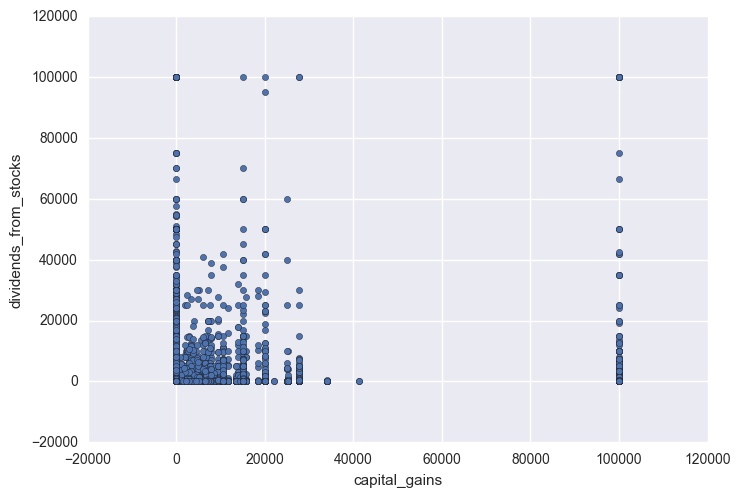

In [35]:
census_income_train[['capital_gains','dividends_from_stocks']].plot(x='capital_gains',y='dividends_from_stocks', kind='scatter')
# find 'capital_gains','dividends_from_stocks' have linear relationship

In [37]:
cat_train.groupby('capital_losses').agg({'income_level': ['mean', 'count']})

income_level        
                         mean   count
capital_losses                       
(-4.608, 460.8]      0.057337  195667
(460.8, 921.6]       0.098039      51
(921.6, 1382.4]      0.029412      68
(1382.4, 1843.2]     0.078303    1226
(1843.2, 2304]       0.405598    1965
(2304, 2764.8]       0.504566     438
(2764.8, 3225.6]     0.716981      53
(3225.6, 3686.4]     0.285714      14
(3686.4, 4147.2]     0.000000       7
(4147.2, 4608]       0.000000      34

In [38]:
cat_train.groupby(['detailed_industry_recode']).agg({'income_level': ['mean', 'count']})

income_level        
                                 mean   count
detailed_industry_recode                     
(-0.051, 5.1]                0.016235  110807
(5.1, 10.2]                  0.113753    2523
(10.2, 15.3]                 0.210294    4760
(15.3, 20.4]                 0.108721    2557
(20.4, 25.5]                 0.136708    4623
(25.5, 30.6]                 0.137130    6286
(30.6, 35.7]                 0.097038   27989
(35.7, 40.8]                 0.075286   11184
(40.8, 45.9]                 0.129544   23961
(45.9, 51]                   0.178150    4833

In [39]:
cat_train.groupby(['detailed_occupation_recode']).agg({'income_level': ['mean', 'count']})

income_level        
                                   mean   count
detailed_occupation_recode                     
(-0.046, 4.6]                  0.045206  114543
(4.6, 9.2]                     0.313466    4916
(9.2, 13.8]                    0.148024    8931
(13.8, 18.4]                   0.208302    8046
(18.4, 23]                     0.031365    9820
(23, 27.6]                     0.024998   11281
(27.6, 32.2]                   0.027544   13760
(32.2, 36.8]                   0.075292   14663
(36.8, 41.4]                   0.046201    8463
(41.4, 46]                     0.039412    5100

In [40]:
cat_train.groupby(['wage_per_hour']).agg({'income_level': ['mean', 'count']})


income_level        
                      mean   count
wage_per_hour                     
(-100-0)          0.062831  188219
(0-400)           0.009615     312
(400-450)         0.008043     746
(450-500)         0.015857    1009
(500-600)         0.009694    1341
(600-800)         0.019992    2401
(800-1000)        0.021338    1734
(1000-1200)       0.026316    1102
(1200-1400)       0.037333     750
(1400-1600)       0.070853     621
(1600-1800)       0.143162     468
(1600-2000)       0.213622     323
(2000-10000)      0.394366     497

# EDA

In [17]:
from sklearn.preprocessing import LabelEncoder

data = census_income_train.copy()
data_test = census_income_test.copy()

le_col = LabelEncoder()
data[['income_level']] = le_col.fit_transform(data[['income_level']])
data_test[['income_level']] = le_col.fit_transform(data_test[['income_level']])

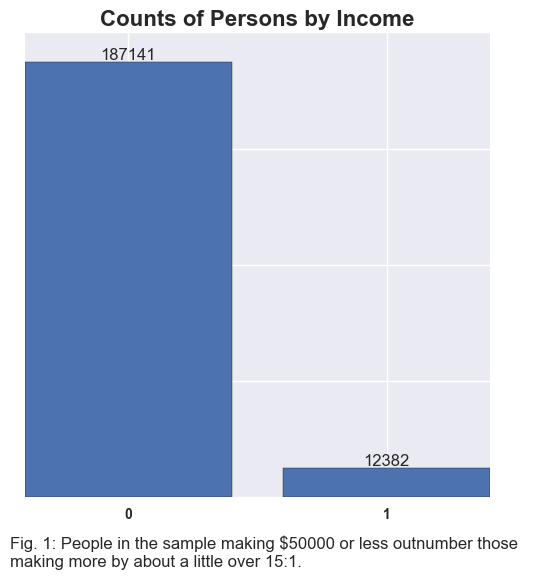

In [18]:

def barsize(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, height+.5, '%d' % int(height), 
                ha='center', va='bottom')

plt.figure(figsize=(6,6))
bars=plt.bar(left=np.arange(data['income_level'].nunique()), height=list(data['income_level'].value_counts()\
                                                                  .values), align='center')
plt.xticks(np.arange(data['income_level'].nunique())/1.00, list(data['income_level'].value_counts().index),
           fontweight='bold')
plt.title('Counts of Persons by Income', fontweight='bold', fontsize=16)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticklabels("")
barsize(bars)
plt.figtext(.1, .01, 'Fig. 1: People in the sample making $50000 or less outnumber those  \n'
            'making more by about a little over 15:1.');

# data is unbalanced

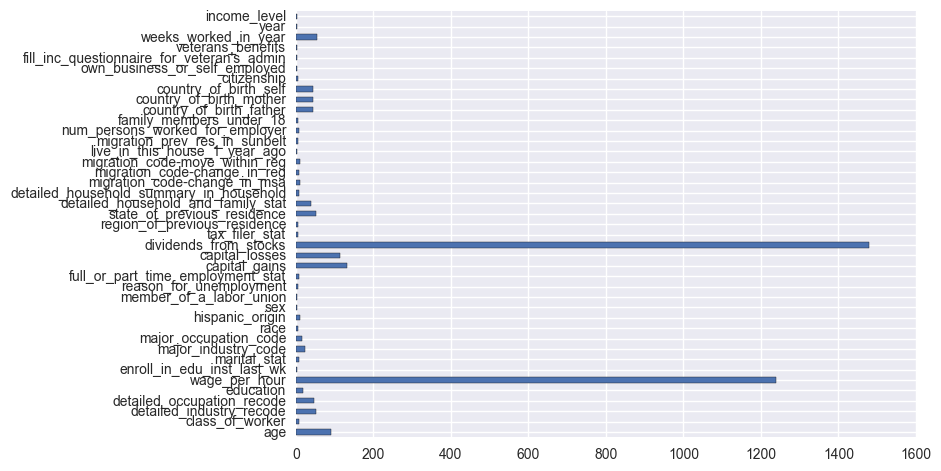

In [19]:
# plot distinct features except  fnlwgt
data.ix[:,data.columns!='instance_weight'].apply(pd.Series.nunique).plot(kind='barh')


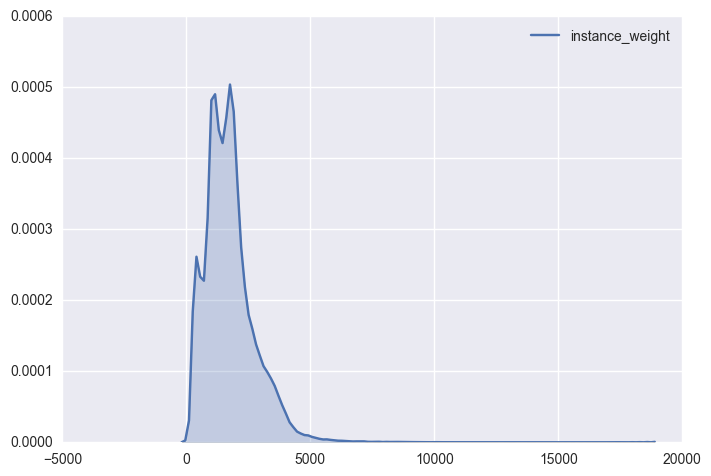

In [20]:
# plt instance_weight distribution; But it can be used on random forest weight
sns.kdeplot(data.instance_weight,shade=True)
# according to the description: 
# The instance weight indicates the number of people in the population
# | that each record represents due to stratified sampling.
# | To do real analysis and derive conclusions, this field must be used.
# | This attribute should *not* be used in the classifiers, so it is
# | set to "ignore" in this file.

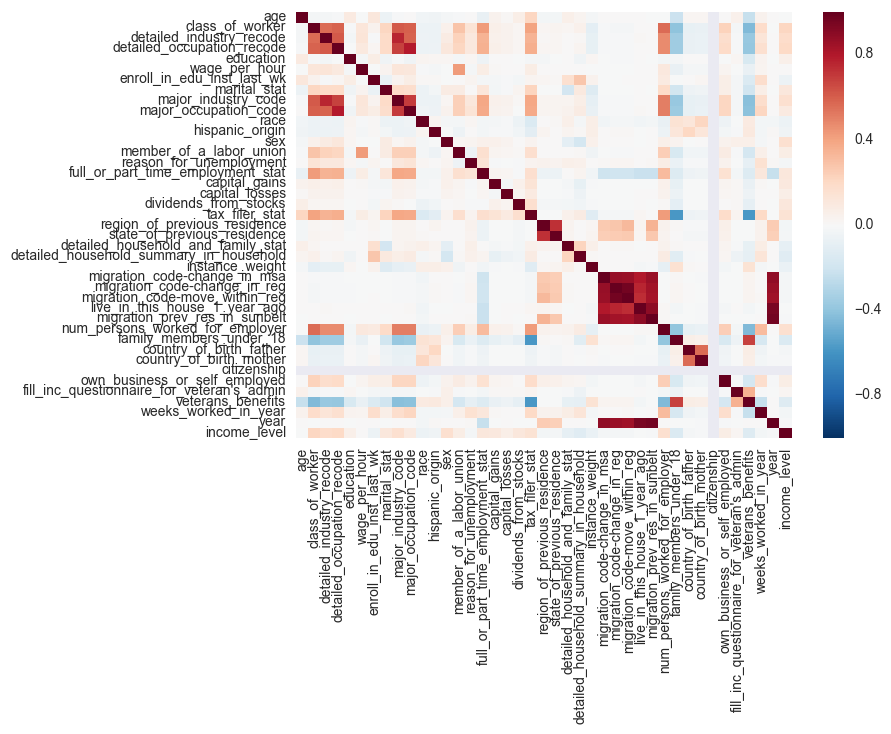

In [21]:
# confusion matrix
nominals = ['age',
 'class_of_worker',
 'detailed_industry_recode',
 'detailed_occupation_recode',
 'education',
 'wage_per_hour',
 'enroll_in_edu_inst_last_wk',
 'marital_stat',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'hispanic_origin',
 'sex',
 'member_of_a_labor_union',
 'reason_for_unemployment',
 'full_or_part_time_employment_stat',
 'capital_gains',
 'capital_losses',
 'dividends_from_stocks',
 'tax_filer_stat',
 'region_of_previous_residence',
 'state_of_previous_residence',
 'detailed_household_and_family_stat',
 'detailed_household_summary_in_household',
 'instance_weight',
 'migration_code-change_in_msa',
 'migration_code-change_in_reg',
 'migration_code-move_within_reg',
 'live_in_this_house_1_year_ago',
 'migration_prev_res_in_sunbelt',
 'num_persons_worked_for_employer',
 'family_members_under_18',
 'country_of_birth_father',
 'country_of_birth_mother',
 'citizenship',
 'own_business_or_self_employed',
 "fill_inc_questionnaire_for_veteran's_admin",
 'veterans_benefits',
 'weeks_worked_in_year',
 'year',
 'income_level']
us_data = data[data['country_of_birth_self']==" United-States"]
us_data = us_data.ix[:,nominals]
for c in us_data.columns:
    us_data[c] = pd.factorize(np.array(us_data[c]))[0]
plt.xticks(rotation=45)
sns.heatmap(us_data.corr())   

# income_level has some correlations with class_of_worker, detailed_industry_recode, detailed_occupation_recode,
# major_industry_code, marital_stat, major_occupation_code, sex, 'full_or_part_time_employment_stat',
# 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'tax_filer_stat','detailed_household_and_family_stat',
# 'detailed_household_summary_in_household', 'num_persons_worked_for_employer', 'family_members_under_18',
# 'citizenship', 'own_business_or_self_employed','veterans_benefits'

# Hypothesis 1: People who are older earn more



In [22]:
def prob_table(feature, data):
    data_prob = data.groupby([feature, 'income_level']).size().unstack().reset_index()
    data_prob['>50K'] = 100 * (data_prob.iloc[:, 2] / (data_prob.iloc[:, 1] + data_prob.iloc[:, 2]))
    data_prob['<=50K'] = 100 * (data_prob.iloc[:, 1] / (data_prob.iloc[:, 1] + data_prob.iloc[:, 2]))
    data_prob['total'] = data_prob.iloc[:, 1] + data_prob.iloc[:, 2]
    
    return data_prob


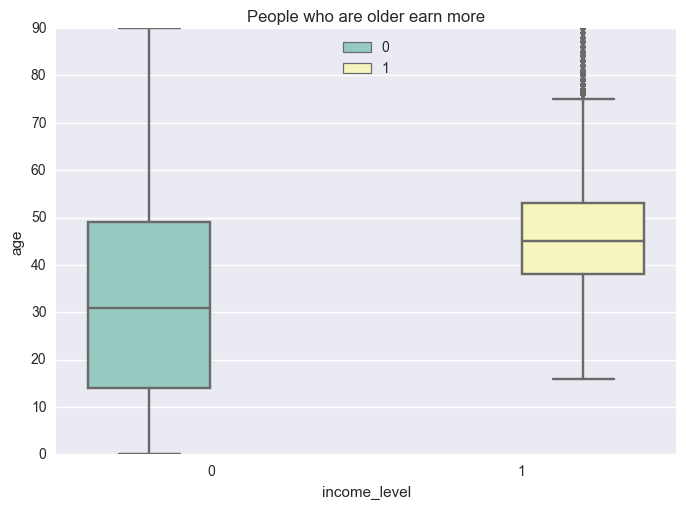

In [23]:
sns.boxplot(x='income_level', y='age', hue="income_level", data=data, palette="Set3")
plt.title('People who are older earn more')
plt.legend(loc='upper center')

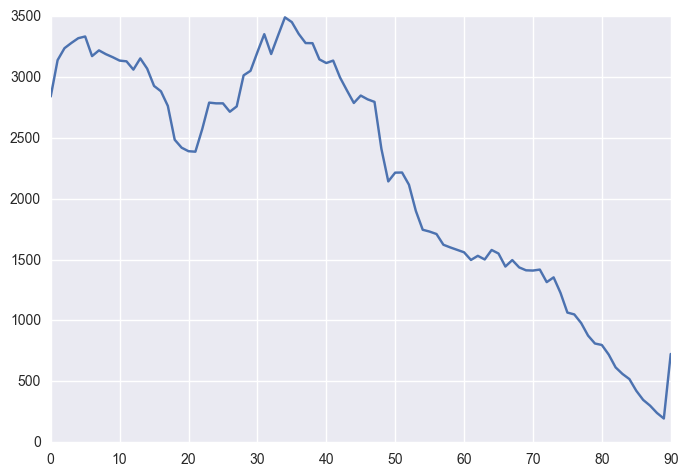

In [24]:
plt.plot(data[['age', 'income_level']].groupby(['age']).agg({'count'}))

In [25]:
data.groupby('income_level').agg({'age': 'median'})
# people who earn above 50K tend to be aged around 45, while people who earn below 50K tend to be aged around 31.

,age
income_level,
0,31
1,45


# Hypothesis 2: Income bias based on working class


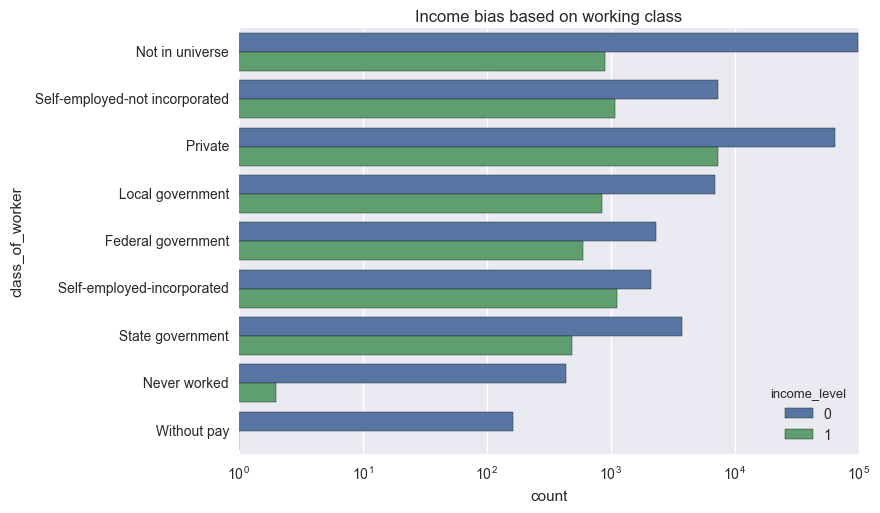

In [26]:
sns.countplot(y='class_of_worker', hue='income_level', data=data).set_xscale('log') # log scale of count
plt.title("Income bias based on working class")

In [27]:
# people who are self-employed and have a company, Federal government are more likely to earn above 50K.
#calculate the class proportions
prob_table('class_of_worker', data)

income_level,class_of_worker,0,1,>50K,<=50K,total
0,Federal government,2328,597,20.410256,79.589744,2925
1,Local government,6937,847,10.881295,89.118705,7784
2,Never worked,437,2,0.455581,99.544419,439
3,Not in universe,99341,904,0.901791,99.098209,100245
4,Private,64706,7322,10.165491,89.834509,72028
5,Self-employed-incorporated,2131,1134,34.732006,65.267994,3265
6,Self-employed-not incorporated,7355,1090,12.907046,87.092954,8445
7,State government,3742,485,11.473859,88.526141,4227
8,Without pay,164,1,0.606061,99.393939,165


# Hypothesis 3: People with more education earn more

Important: It should be related to the level of earning power of an individual:

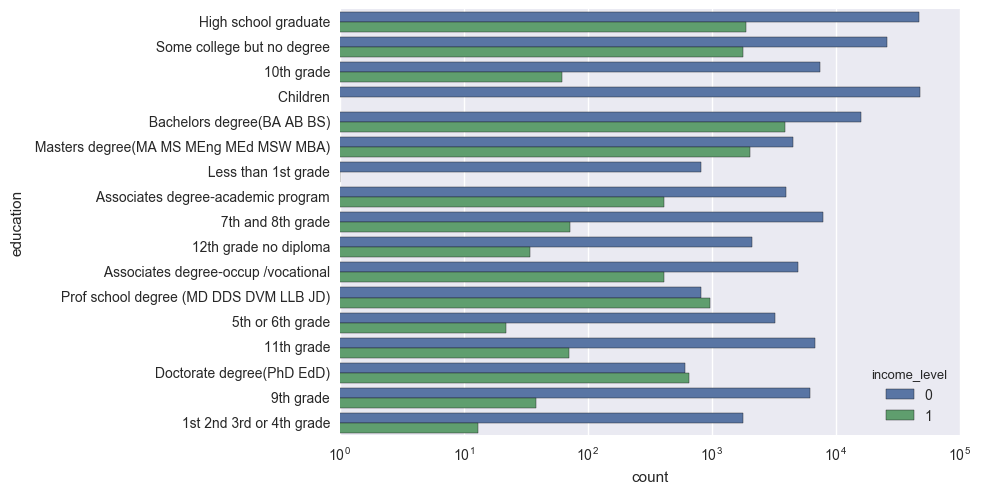

In [28]:
sns.countplot(y='education', hue='income_level', data=data).set_xscale('log') # log scale of count

In [29]:
prob_table('education', data)
# income bias: Doctorate > Masters > Bacharelors. 
# the more the person is educated, the greater the probability to earn above 50K.

income_level,education,0,1,>50K,<=50K,total
0,10th grade,7495.0,62.0,0.820431,99.179569,7557.0
1,11th grade,6806.0,70.0,1.018034,98.981966,6876.0
2,12th grade no diploma,2092.0,34.0,1.599247,98.400753,2126.0
3,1st 2nd 3rd or 4th grade,1786.0,13.0,0.722624,99.277376,1799.0
4,5th or 6th grade,3255.0,22.0,0.671346,99.328654,3277.0
5,7th and 8th grade,7935.0,72.0,0.899213,99.100787,8007.0
6,9th grade,6192.0,38.0,0.609952,99.390048,6230.0
7,Associates degree-academic program,3951.0,412.0,9.443044,90.556956,4363.0
8,Associates degree-occup /vocational,4945.0,413.0,7.708100,92.291900,5358.0
9,Bachelors degree(BA AB BS),15950.0,3915.0,19.708029,80.291971,19865.0


# Hypothesis 4: Married people tend to earn more

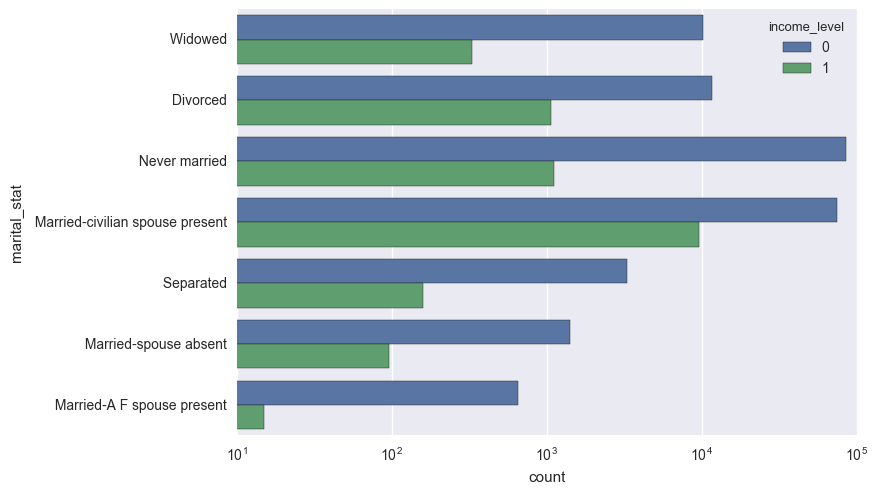

In [30]:
sns.countplot(y='marital_stat', hue='income_level', data=data).set_xscale('log') # log scale of count

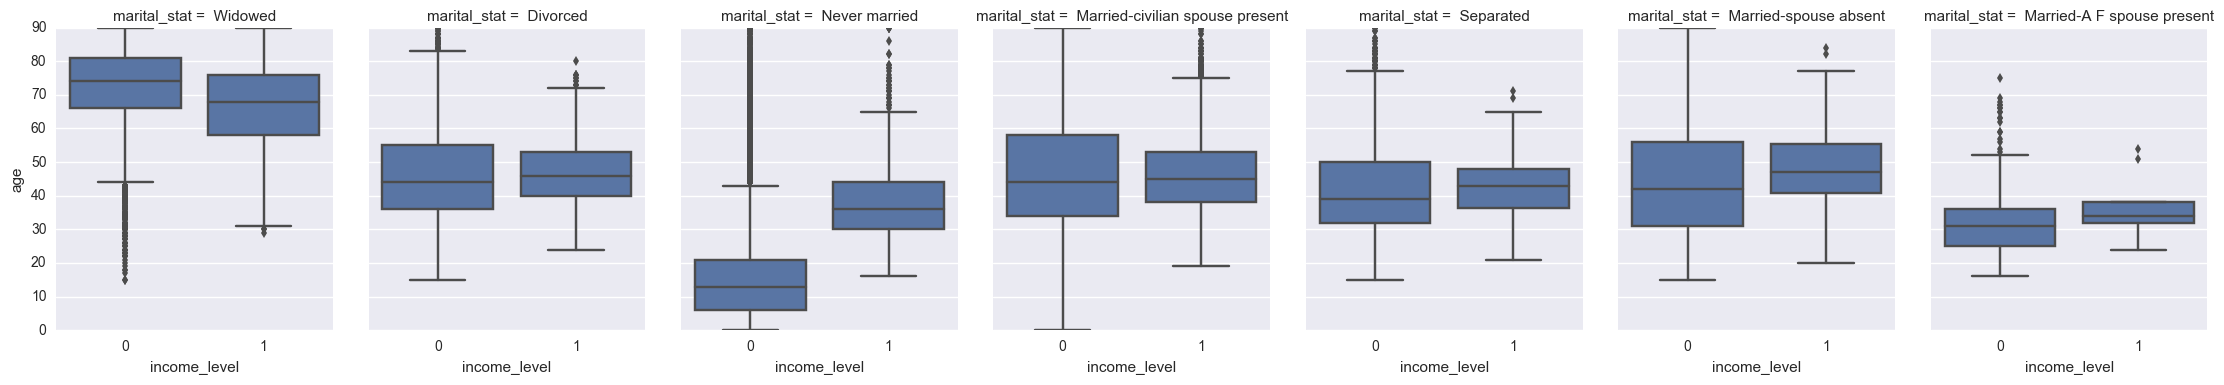

In [49]:

g = sns.FacetGrid(data, col='marital_stat', size=4, aspect=.8)
g = g.map(sns.boxplot, 'income_level', 'age')
sns.plt.show()

In [31]:
prob_table('marital_stat', data)

# married people earn better as compared to people who are single

income_level,marital_stat,0,1,>50K,<=50K,total
0,Divorced,11644,1066,8.387097,91.612903,12710
1,Married-A F spouse present,650,15,2.255639,97.744361,665
2,Married-civilian spouse present,74622,9600,11.398447,88.601553,84222
3,Married-spouse absent,1422,96,6.324111,93.675889,1518
4,Never married,85368,1117,1.291553,98.708447,86485
5,Separated,3302,158,4.566474,95.433526,3460
6,Widowed,10133,330,3.153971,96.846029,10463


# Hypothesis 5: There is a bias in income based on race

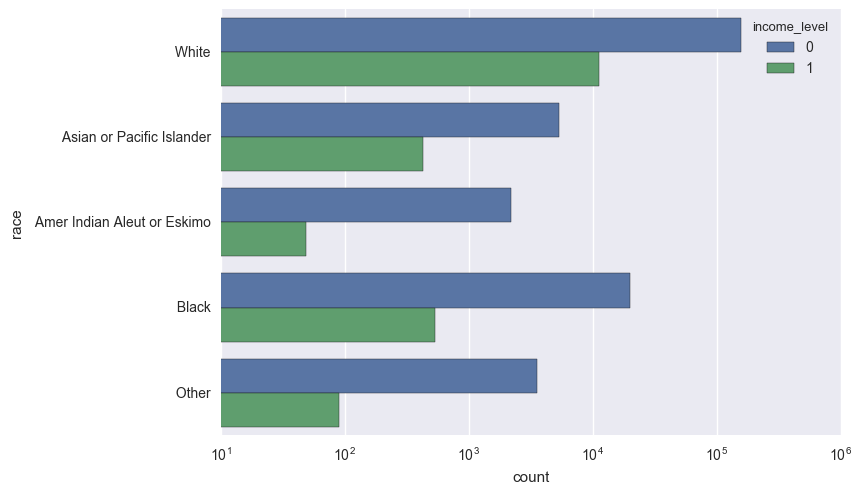

In [32]:
sns.countplot(y='race', hue='income_level', data=data).set_xscale('log') # log scale of count

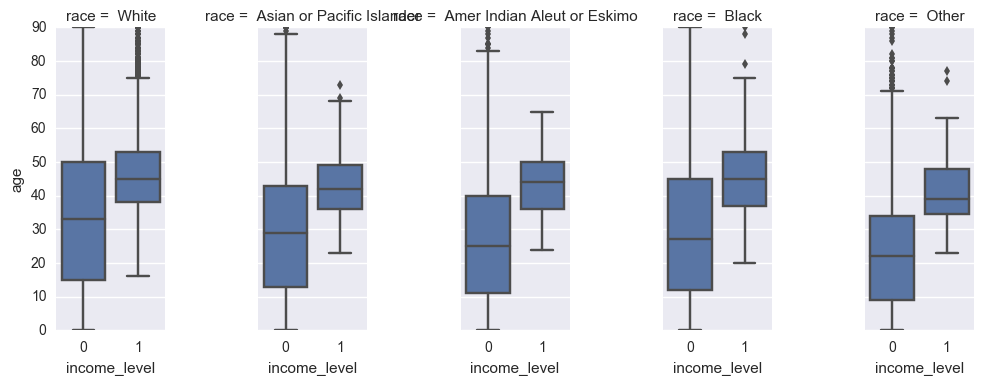

In [52]:
# Age and income counts by Race
g = sns.FacetGrid(data, col='race', size=4, aspect=.5)
g = g.map(sns.boxplot, 'income_level', 'age')
sns.plt.show()

In [33]:
prob_table('race', data)

# Asian Pacific people and Whites have the highest earning power

income_level,race,0,1,>50K,<=50K,total
0,Amer Indian Aleut or Eskimo,2202,49,2.176810,97.823190,2251
1,Asian or Pacific Islander,5405,430,7.369323,92.630677,5835
2,Black,19875,540,2.645114,97.354886,20415
3,Other,3566,91,2.488378,97.511622,3657
4,White,156093,11272,6.734980,93.265020,167365


# Hypothesis 6: There is a bias in the income based on occupation

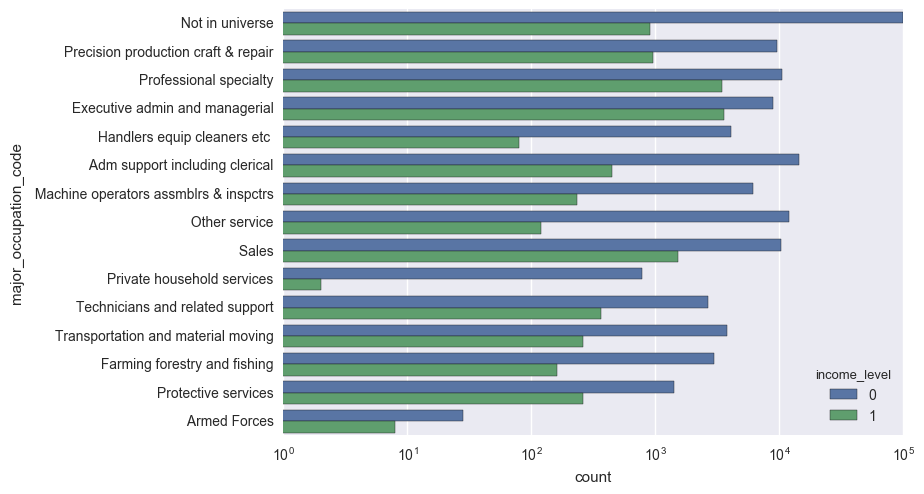

In [34]:
sns.countplot(y='major_occupation_code', hue='income_level', data=data).set_xscale('log') # log scale of count


In [35]:
prob_table('major_occupation_code', data)

# people who are in specialized or managerial positions earn more

income_level,major_occupation_code,0,1,>50K,<=50K,total
0,Adm support including clerical,14391,446,3.005999,96.994001,14837
1,Armed Forces,28,8,22.222222,77.777778,36
2,Executive admin and managerial,8902,3593,28.755502,71.244498,12495
3,Farming forestry and fishing,2986,160,5.085823,94.914177,3146
4,Handlers equip cleaners etc,4048,79,1.914223,98.085777,4127
5,Machine operators assmblrs & inspctrs,6144,235,3.683963,96.316037,6379
6,Not in universe,99778,906,0.899845,99.100155,100684
7,Other service,11979,120,0.991818,99.008182,12099
8,Precision production craft & repair,9563,955,9.079673,90.920327,10518
9,Private household services,778,2,0.256410,99.743590,780


# Hypothesis 7: Men earn more


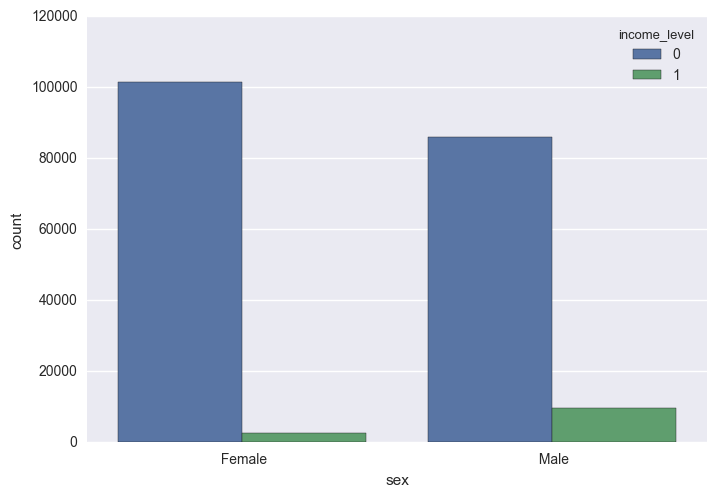

In [36]:
sns.countplot(x='sex', hue='income_level', data=data)

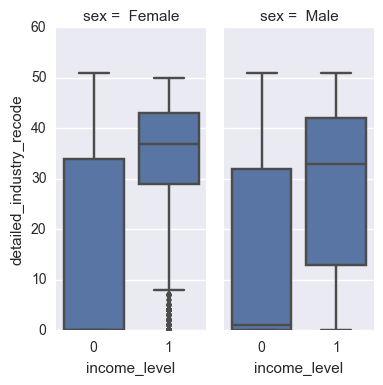

In [45]:
# Detailed_industry_recode and income counts by Gender
g = sns.FacetGrid(data, col='sex', size=4, aspect=.5)
g = g.map(sns.boxplot, 'income_level', 'detailed_industry_recode')
sns.plt.show()

In [37]:
prob_table('sex', data)

# males have a higher earning power as compared to females.

income_level,sex,0,1,>50K,<=50K,total
0,Female,101321,2663,2.560971,97.439029,103984
1,Male,85820,9719,10.172809,89.827191,95539


# Hypothesis 8: People who work in more hours earn more

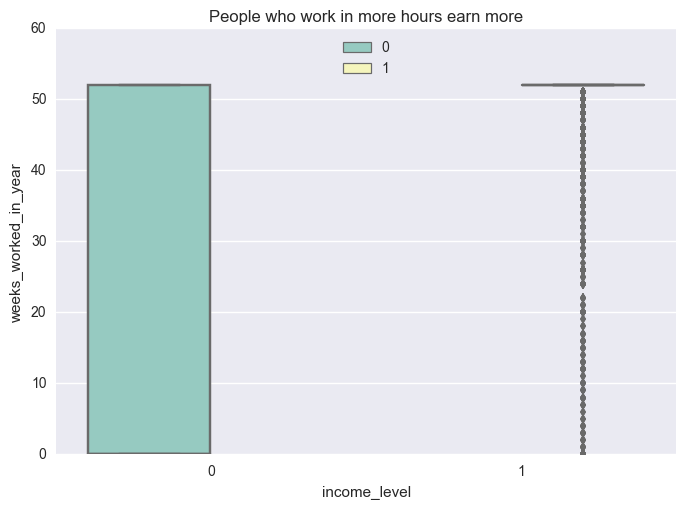

In [38]:
sns.boxplot(x='income_level', y='weeks_worked_in_year', hue="income_level", data=data, palette="Set3")
plt.title('People who work in more hours earn more')
plt.legend(loc='upper center')

In [39]:
data.groupby('income_level').agg({'weeks_worked_in_year': 'mean'}).rename(columns={'weeks_worked_in_year': 'weeks'})
# people who earn above 50K work more than 48 weeks in average

,weeks
income_level,
0,21.527762
1,48.069617


# Hypothesis 9: There is a bias in income based on the country of origin

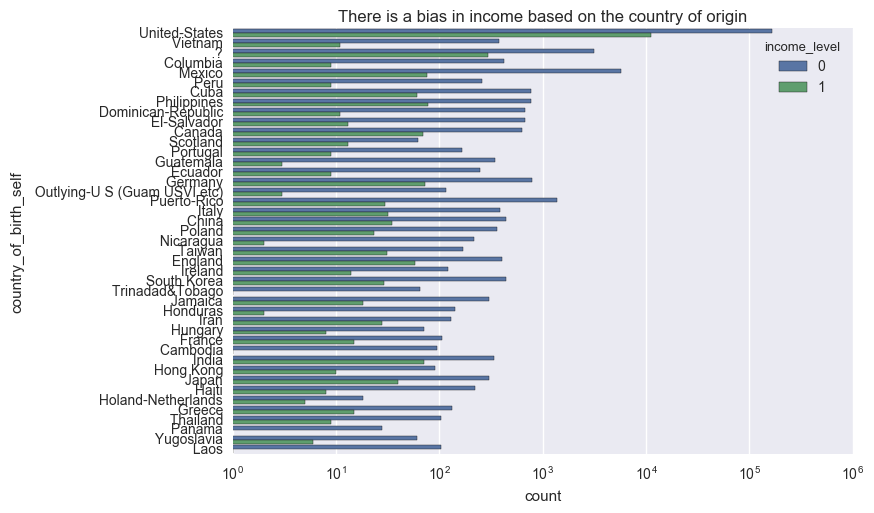

In [40]:
g = sns.countplot(y='country_of_birth_self', hue='income_level', data=data)
g.set_xscale('log') # log scale of count
plt.title('There is a bias in income based on the country of origin')

In [41]:
prob_table('country_of_birth_self', data)
# Taiwanese, French, Iranians, Holand-Netherlands, and Indians are the most well-earning people among different countries

income_level,country_of_birth_self,0,1,>50K,<=50K,total
0,?,3096.0,297.0,8.753316,91.246684,3393.0
1,Cambodia,94.0,1.0,1.052632,98.947368,95.0
2,Canada,631.0,69.0,9.857143,90.142857,700.0
3,China,443.0,35.0,7.322176,92.677824,478.0
4,Columbia,425.0,9.0,2.073733,97.926267,434.0
5,Cuba,777.0,60.0,7.168459,92.831541,837.0
6,Dominican-Republic,679.0,11.0,1.594203,98.405797,690.0
7,Ecuador,249.0,9.0,3.488372,96.511628,258.0
8,El-Salvador,676.0,13.0,1.886792,98.113208,689.0
9,England,399.0,58.0,12.691466,87.308534,457.0


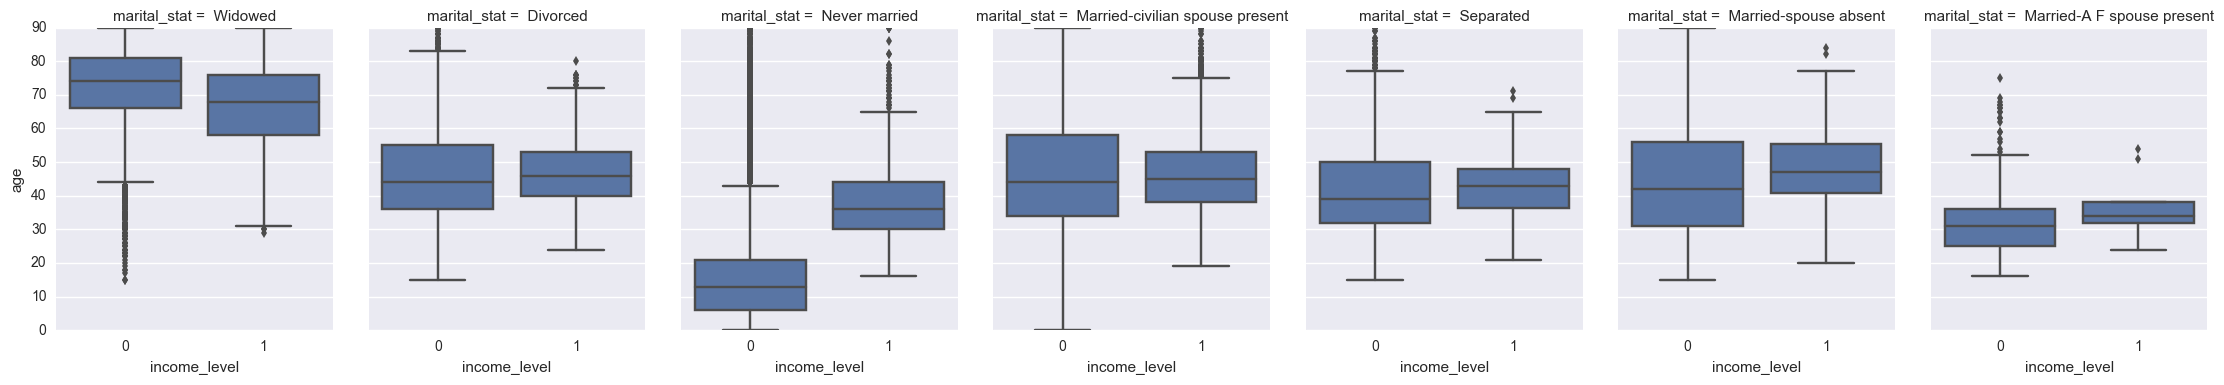

# Data Precessing

In [278]:
data = census_income_train.copy()
data_test = census_income_test.copy()



def def_na(data):
    for col in data.columns:
        data[col][(data[col].isin([' ?', ' NA', '']))] = np.nan
    return data
        
data = def_na(data)
data_test = def_na(data_test)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [279]:
# missing rate by columns in training data
training_miss = pd.DataFrame(np.sum(data.isnull(), axis=0) / float(data.shape[0]), columns=['missing_training_rate'])
testing_miss = pd.DataFrame(np.sum(data_test.isnull(), axis=0) / float(data_test.shape[0]), columns=['missing_testing_rate'])

pd.concat([training_miss, testing_miss], axis=1)
# some missing columns have correlation between them and there would be a much smarter but complicated way to impute them
# I will impute by using the most frequent values for simplicity


,missing_training_rate,missing_testing_rate
age,0.000000,0.000000
class_of_worker,0.000000,0.000000
detailed_industry_recode,0.000000,0.000000
detailed_occupation_recode,0.000000,0.000000
education,0.000000,0.000000
wage_per_hour,0.000000,0.000000
enroll_in_edu_inst_last_wk,0.000000,0.000000
marital_stat,0.000000,0.000000
major_industry_code,0.000000,0.000000
major_occupation_code,0.000000,0.000000


In [258]:
# missing by rows

np.sum(data.isnull(), axis=1) / float(data.shape[1])


0         0.095238
1         0.000000
2         0.095238
3         0.000000
4         0.000000
5         0.095238
6         0.000000
7         0.095238
8         0.095238
9         0.000000
10        0.000000
11        0.166667
12        0.000000
13        0.000000
14        0.095238
15        0.000000
16        0.095238
17        0.000000
18        0.095238
19        0.095238
20        0.000000
21        0.000000
22        0.095238
23        0.000000
24        0.000000
25        0.000000
26        0.047619
27        0.095238
28        0.095238
29        0.000000
            ...   
199493    0.000000
199494    0.000000
199495    0.000000
199496    0.000000
199497    0.095238
199498    0.000000
199499    0.095238
199500    0.023810
199501    0.000000
199502    0.095238
199503    0.095238
199504    0.095238
199505    0.095238
199506    0.000000
199507    0.071429
199508    0.095238
199509    0.000000
199510    0.000000
199511    0.095238
199512    0.095238
199513    0.095238
199514    0.

In [259]:

# missing rate by cells
sum(np.sum(data.isnull())) / float(data.shape[0] * data.shape[1])


0.04971273153136898

In [286]:
def data_precessing_lgr(data=data):
    #Convert 'income_level' to indicator variable:
    income_dummies = pd.get_dummies(data['income_level'], prefix='income_level', drop_first=True)
    data = pd.concat([data, income_dummies], axis=1)
    del data['income_level']

    #country_of_birth_self:

    #Convert value from non United States country to 'Not United States'
    def convert_us(feature_name, data):
        #Convert value from non United States country to 'Not United States'
        data.loc[(data[feature_name]!='United-States') & (data[feature_name].notnull()), 
                feature_name]='Not United States'

        country_dummies = pd.get_dummies(data[feature_name], prefix='origin_country_'+feature_name.split('_')[-1], 
                                         drop_first=True,
                                        dummy_na=True)

        data = pd.concat([data, country_dummies], axis=1)
        del data[feature_name]
        
        return data
    data = convert_us('country_of_birth_self', data)
    data = convert_us('country_of_birth_father', data)
    data = convert_us('country_of_birth_mother', data)
    data = convert_us('citizenship', data)
    

    
    

    #Capital gain/loss: Binned into 0 if capital loss == 0, 1 otherwise. Same for capital gain

    data.loc[data['capital_losses']>0, 'capital_losses'] = 1
    data.loc[data['capital_gains']>0, 'capital_gains'] = 1

    #Sex:

    sex_dummies = pd.get_dummies(data['sex'], prefix='gender', drop_first=True)
    data = pd.concat([data, sex_dummies], axis=1)
    del data['sex']

    #Race: Binned into White/Non-White:

    race_dict = {'Black': 'non_White', 'Asian-Pac-Islander': 'non_White',
                 'Other': 'non_White', 'Amer-Indian-Eskimo': 'non_White'}

    race_dummies = pd.get_dummies(data['race'].replace(race_dict.keys(), race_dict.values()),
                                  prefix='race', drop_first=True)
    data = pd.concat([data, race_dummies], axis=1)
    del data['race']



    #Marital Status: married subgroups binned into one group 'married':

    married_dict = {'Married-civ-spouse': 'Married', 'Married-spouse-absent': 'Married',
                    'Married-AF-spouse': 'Married'}

    marital_dummies = pd.get_dummies(data['marital_stat'].replace(married_dict.keys(),
                                                                   married_dict.values()),
                                                                   prefix='marital_status',
                                                                   drop_first=True)
    data = pd.concat([data, marital_dummies], axis=1)
    del data['marital_stat']

    #education: binned

    education_dict = {' High school graduate': 'High-school', ' Some college but no degree': 'Bootcamp',
       ' 10th grade': 'HS-nongrad', ' Children': 'No-school', ' Bachelors degree(BA AB BS)': 'Bachelor',
       ' Masters degree(MA MS MEng MEd MSW MBA)': 'Master', ' Less than 1st grade': 'No-school',
       ' Associates degree-academic program': 'Bootcamp', ' 7th and 8th grade': 'Grade-school',
       ' 12th grade no diploma': 'HS-nongrad', ' Associates degree-occup /vocational': 'Bootcamp',
       ' Prof school degree (MD DDS DVM LLB JD)': 'PHD', ' 5th or 6th grade': 'Grade-school',
       ' 11th grade': 'HS-nongrad', ' Doctorate degree(PhD EdD)': 'PHD', ' 9th grade': 'Grade-school',
       ' 1st 2nd 3rd or 4th grade': 'Grade-school'}
    
    
    educ_dummies = pd.get_dummies(data.education.replace(education_dict.keys(), 
                                                        education_dict.values()),
                                                        prefix='education',
                                                        drop_first=True)

    data = pd.concat([data, educ_dummies], axis=1)
    del data['education']

    #class_of_worker:

    #Those who have a workclass of 'never worked' or 'without pay' will be dropped as we want to
    #focus our attention on wage earners:

    data.drop(data.loc[(data.class_of_worker=='Without-pay') | (data.class_of_worker=='Never-worked'), :].index,
            inplace=True)

    class_dict = {'Local-gov': 'Government', 'State-gov': 'Government', 'Federal-gov': 'Government',
                  'Self-emp-not-inc': 'Self-employed', 'Self-emp-inc': 'Self-employed'}

    class_dummies= pd.get_dummies(data.class_of_worker.replace(class_dict.keys(), class_dict.values()),
                                  prefix='workclass', drop_first=True, dummy_na=True)

    data = pd.concat([data, class_dummies], axis=1)
    del data['class_of_worker']
    
    
    #Age

    #applying a log transformation on age to maintain its interpretability and 
    #make variable's scale closer to values of indicator variables.
        
    data['age'] =  map(lambda x: np.log10(x) if x !=0 else np.log10(x+1), data['age'])

    
    #weeks worked will be binned. 35-40wks will be 'full-time'; <35 will be part-time;
    #>40 will be '40+wks'

    data['weeks_worked_in_year'] = np.nan
    data.loc[(data['weeks_worked_in_year']>=35) | (data['weeks_worked_in_year']<=40), 'weeks_worked_in_year'] = 'Full_time'
    data.loc[data['weeks_worked_in_year']<35, 'weeks_worked_in_year'] = 'Part_time'
    data.loc[data['weeks_worked_in_year']>40, 'weeks_worked_in_year'] = '40+wks'

    weeks_dummies = pd.get_dummies(data['weeks_worked_in_year'], prefix='WksYrs', drop_first=True)

    data = pd.concat([data, weeks_dummies], axis=1)

    del data['weeks_worked_in_year']
    
    #create a set of dummies for all of them
    
    # memory leak for the notebook
    
#     rest_features = ['detailed_industry_recode',
#                      'detailed_occupation_recode',
#                      'wage_per_hour',
#                      'enroll_in_edu_inst_last_wk',
#                      'major_industry_code',
#                      'major_occupation_code',
#                      'hispanic_origin',
#                      'member_of_a_labor_union',
#                      'reason_for_unemployment',
#                      'full_or_part_time_employment_stat',
#                      'dividends_from_stocks',
#                      'tax_filer_stat',
#                      'region_of_previous_residence',
#                      'state_of_previous_residence',
#                      'detailed_household_and_family_stat',
#                      'detailed_household_summary_in_household',
#                      'instance_weight',
#                      'migration_code-change_in_msa',
#                      'migration_code-change_in_reg',
#                      'migration_code-move_within_reg',
#                      'live_in_this_house_1_year_ago',
#                      'migration_prev_res_in_sunbelt',
#                      'num_persons_worked_for_employer',
#                      'family_members_under_18',
#                       'own_business_or_self_employed',
#                      "fill_inc_questionnaire_for_veteran's_admin",
#                      'veterans_benefits',
#                      'year']

#     for feature in rest_features:
#         col_dummies = pd.get_dummies(data[feature], prefix=feature, drop_first=True)
#         data = pd.concat([data, col_dummies], axis=1)
#     del data[feature]
 
    return data

In [281]:
from sklearn.preprocessing import LabelEncoder

def data_precessing_tree(data=data):
    data = data.copy()
    def encoder(feature, data):
        le_col = LabelEncoder()
        data[[feature]] = le_col.fit_transform(data[[feature]])
        return data
        
        
    #Convert 'income_level' to indicator variable:
    data = encoder('income_level', data)
    

    #country_of_birth_self:

    #Convert value from non United States country to 'Not United States'
    def convert_us(feature_name, data):
        #Convert value from non United States country to 'Not United States'
        data.loc[(data[feature_name]!='United-States') & (data[feature_name].notnull()), 
                feature_name]='Not United States'
        data = encoder(feature_name, data)
        
        
        return data
    data = convert_us('country_of_birth_self', data)
    data = convert_us('country_of_birth_father', data)
    data = convert_us('country_of_birth_mother', data)
    data = convert_us('citizenship', data)
    

    
    

    #Capital gain/loss: Binned into 0 if capital loss == 0, 1 otherwise. Same for capital gain

    data.loc[data['capital_losses']>0, 'capital_losses'] = 1
    data.loc[data['capital_gains']>0, 'capital_gains'] = 1

    #Sex:

    data = encoder('sex', data)

    #Race: Binned into White/Non-White:

    race_dict = {'Black': 'non_White', 'Asian-Pac-Islander': 'non_White',
                 'Other': 'non_White', 'Amer-Indian-Eskimo': 'non_White'}

    data = encoder('race', data)



    #Marital Status: married subgroups binned into one group 'married':

    married_dict = {'Married-civ-spouse': 'Married', 'Married-spouse-absent': 'Married',
                    'Married-AF-spouse': 'Married'}

    data = encoder('marital_stat', data)

    #education: binned

    education_dict = {' High school graduate': 'High-school', ' Some college but no degree': 'Bootcamp',
       ' 10th grade': 'HS-nongrad', ' Children': 'No-school', ' Bachelors degree(BA AB BS)': 'Bachelor',
       ' Masters degree(MA MS MEng MEd MSW MBA)': 'Master', ' Less than 1st grade': 'No-school',
       ' Associates degree-academic program': 'Bootcamp', ' 7th and 8th grade': 'Grade-school',
       ' 12th grade no diploma': 'HS-nongrad', ' Associates degree-occup /vocational': 'Bootcamp',
       ' Prof school degree (MD DDS DVM LLB JD)': 'PHD', ' 5th or 6th grade': 'Grade-school',
       ' 11th grade': 'HS-nongrad', ' Doctorate degree(PhD EdD)': 'PHD', ' 9th grade': 'Grade-school',
       ' 1st 2nd 3rd or 4th grade': 'Grade-school'}
    
    
    data = encoder('education', data)

    #class_of_worker:

    #Those who have a workclass of 'never worked' or 'without pay' will be dropped as we want to
    #focus our attention on wage earners:

    data.drop(data.loc[(data.class_of_worker=='Without-pay') | (data.class_of_worker=='Never-worked'), :].index,
            inplace=True)

    class_dict = {'Local-gov': 'Government', 'State-gov': 'Government', 'Federal-gov': 'Government',
                  'Self-emp-not-inc': 'Self-employed', 'Self-emp-inc': 'Self-employed'}

    data = encoder('class_of_worker', data)
    
    
    #Age

    #applying a log transformation on age to maintain its interpretability and 
    #make variable's scale closer to values of indicator variables.
        
    data['age'] =  map(lambda x: np.log10(x) if x !=0 else np.log10(x+1), data['age'])

    
    #weeks worked will be binned. 35-40wks will be 'full-time'; <35 will be part-time;
    #>40 will be '40+wks'

    data['weeks_worked_in_year'] = np.nan
    data.loc[(data['weeks_worked_in_year']>=35) | (data['weeks_worked_in_year']<=40), 'weeks_worked_in_year'] = 'Full_time'
    data.loc[data['weeks_worked_in_year']<35, 'weeks_worked_in_year'] = 'Part_time'
    data.loc[data['weeks_worked_in_year']>40, 'weeks_worked_in_year'] = '40+wks'

    data = encoder('weeks_worked_in_year', data)
    
    
#     # Create encoding for following features
#     rest_features = ['detailed_industry_recode',
#                      'detailed_occupation_recode',
#                      'wage_per_hour',
#                      'enroll_in_edu_inst_last_wk',
#                      'major_industry_code',
#                      'major_occupation_code',
#                      'hispanic_origin',
#                      'member_of_a_labor_union',
#                      'reason_for_unemployment',
#                      'full_or_part_time_employment_stat',
#                      'dividends_from_stocks',
#                      'tax_filer_stat',
#                      'region_of_previous_residence',
#                      'state_of_previous_residence',
#                      'detailed_household_and_family_stat',
#                      'detailed_household_summary_in_household',
#                      'instance_weight',
#                      'migration_code-change_in_msa',
#                      'migration_code-change_in_reg',
#                      'migration_code-move_within_reg',
#                      'live_in_this_house_1_year_ago',
#                      'migration_prev_res_in_sunbelt',
#                      'num_persons_worked_for_employer',
#                      'family_members_under_18',
#                       'own_business_or_self_employed',
#                      "fill_inc_questionnaire_for_veteran's_admin",
#                      'veterans_benefits',
#                      'year']

#     for feature in rest_features:
#         data = encoder(feature, data)
 
    return data

In [295]:
def model_data(data, data_test):
    
# Imputing by using the most frequent variables for simplicity
# def impute_mode(incomplete_data, feature_list):
#     for col in feature_list:
#         incomplete_data[col][incomplete_data[col].isnull()] = incomplete_data[col].value_counts().index[0]
#         print incomplete_data[col].unique()
#     return incomplete_data

# missing_col = ['migration_code-change_in_msa', 'migration_code-move_within_reg', 'migration_prev_res_in_sunbelt', \
#               'hispanic_origin', 'state_of_previous_residence', 'country_of_birth_father', 'country_of_birth_mother', \
#               'country_of_birth_self', 'state_of_previous_residence']


    def impute_mode(data):
        data['migration_code-change_in_msa'][data['migration_code-change_in_msa'].isnull()] = \
            data['migration_code-change_in_msa'].value_counts().index[0] # Nonmover

        data['migration_code-change_in_reg'][data['migration_code-change_in_reg'].isnull()] = 'Nonmover'
        data['migration_code-move_within_reg'][data['migration_code-move_within_reg'].isnull()] = 'Nonmover'
        data['migration_prev_res_in_sunbelt'][data['migration_prev_res_in_sunbelt'].isnull()] = 'Not in universe'
        data['hispanic_origin'][data['hispanic_origin'].isnull()] = 'All other'
        data['state_of_previous_residence'][data['state_of_previous_residence'].isnull()] = 'Not in universe'
        data['country_of_birth_father'][data['country_of_birth_father'].isnull()] = 'United-States'
        data['country_of_birth_mother'][data['country_of_birth_mother'].isnull()] = 'United-States'
        data['country_of_birth_self'][data['country_of_birth_self'].isnull()] = 'United-States'
        data['state_of_previous_residence'][data['state_of_previous_residence'].isnull()] = 'Not in universe'

    #     sum(np.sum(data.isnull(), 1))  # 0

        return data


    complete_data = impute_mode(data)
    complete_data_test = impute_mode(data_test)

    complete_data_tree = impute_mode(data)
    complete_data_tree_test = impute_mode(data_test)


    # keep the same variables as logistic regression 
    filter_out = ['detailed_industry_recode',
                 'detailed_occupation_recode',
                 'wage_per_hour',
                 'enroll_in_edu_inst_last_wk',
                 'major_industry_code',
                 'major_occupation_code',
                 'hispanic_origin',
                 'member_of_a_labor_union',
                 'reason_for_unemployment',
                 'full_or_part_time_employment_stat',
                 'dividends_from_stocks',
                 'tax_filer_stat',
                 'region_of_previous_residence',
                 'state_of_previous_residence',
                 'detailed_household_and_family_stat',
                 'detailed_household_summary_in_household',
                 'instance_weight',
                 'migration_code-change_in_msa',
                 'migration_code-change_in_reg',
                 'migration_code-move_within_reg',
                 'live_in_this_house_1_year_ago',
                 'migration_prev_res_in_sunbelt',
                 'num_persons_worked_for_employer',
                 'family_members_under_18',
                  'own_business_or_self_employed',
                 "fill_inc_questionnaire_for_veteran's_admin",
                 'veterans_benefits',
                 'year']


    train_tree = complete_data_tree[complete_data_tree.columns[np.logical_not(complete_data_tree.columns.isin(filter_out))]]
    test_tree = complete_data_tree_test[complete_data_tree_test.columns[np.logical_not(complete_data_tree_test.columns.isin(filter_out))]]
    train_tree = data_precessing_tree(data=train_tree)
    test_tree = data_precessing_tree(data=test_tree)
    
    train = complete_data[complete_data.columns[np.logical_not(complete_data.columns.isin(filter_out))]]
    test = complete_data_test[complete_data_test.columns[np.logical_not(complete_data_test.columns.isin(filter_out))]]
    train = data_precessing_tree(data=train)
    test = data_precessing_tree(data=test)

    return [train_tree, test_tree, train, test]

[train_tree, test_tree, train, test] = model_data(data, data_test)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be s

# Machine Learning Model

## Data preparation

In [298]:
y_train = train['income_level']
train.drop(['income_level'], axis=1, inplace=True)
y_test = test['income_level']
test.drop(['income_level'], axis=1, inplace=True)


In [299]:
import sklearn
import sklearn.cross_validation
from __future__ import print_function
import sklearn.metrics
import time

def evaluate_model(clf, train=train, test=test):
    """Scores a model using log loss with the created train and test sets."""
    start = time.time()
    clf.fit(train, y_train)
    train_loss = sklearn.metrics.log_loss(y_train, clf.predict_proba(train))
    test_loss = sklearn.metrics.log_loss(y_test, clf.predict_proba(test))
    print("Train score:", train_loss)
    print("Test score:", test_loss)
    print("Total time:", time.time() - start)
    print()
    print ("Train accuracy: ", (clf.predict(train) == y_train).mean())
    print ("Test accuracy: ", (clf.predict(test) == y_test).mean())
    return [test_loss, clf.predict_proba(test)]

# Logistic Regression

In [300]:
# Scaling the variables is often useful and will make the model converge more quickly.
# Let's try it using a Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scale', StandardScaler()), ('classifier', LogisticRegression())])
evaluate_model(pipe)

Train score: 0.182786699353
Test score: 0.182723990911
Total time: 1.45919585228

Train accuracy:  0.936839361878
Test accuracy:  0.937060203284


[0.18272399091067276, array([[ 0.98433161,  0.01566839],
        [ 0.96361573,  0.03638427],
        [ 0.99760118,  0.00239882],
        ..., 
        [ 0.94495539,  0.05504461],
        [ 0.98025702,  0.01974298],
        [ 0.88899542,  0.11100458]])]

In [201]:
# Grid search: try 8 different possibilities
from sklearn.grid_search import GridSearchCV

params = {'C' : [0.1,1], 'penalty': ['l1', 'l2'], 
          'class_weight':[None, 'balanced'] }
grid = GridSearchCV(LogisticRegression(), params, scoring='log_loss')
[test_loss, predict_test] = evaluate_model(grid)
grid.grid_scores_

Train score: 0.144343951027
Test score: 0.143918653525
Total time: 240.172055006

Train accuracy:  0.944723164748
Test accuracy:  0.944708406006


[mean: -0.14479, std: 0.00156, params: {'penalty': 'l1', 'C': 0.1, 'class_weight': None},
 mean: -0.14529, std: 0.00157, params: {'penalty': 'l2', 'C': 0.1, 'class_weight': None},
 mean: -0.37694, std: 0.00436, params: {'penalty': 'l1', 'C': 0.1, 'class_weight': 'balanced'},
 mean: -0.37742, std: 0.00435, params: {'penalty': 'l2', 'C': 0.1, 'class_weight': 'balanced'},
 mean: -0.14462, std: 0.00158, params: {'penalty': 'l1', 'C': 1, 'class_weight': None},
 mean: -0.14465, std: 0.00159, params: {'penalty': 'l2', 'C': 1, 'class_weight': None},
 mean: -0.37688, std: 0.00436, params: {'penalty': 'l1', 'C': 1, 'class_weight': 'balanced'},
 mean: -0.37691, std: 0.00436, params: {'penalty': 'l2', 'C': 1, 'class_weight': 'balanced'}]

# Store the model

In [308]:
import pickle

# save the model to disk
filename = 'lgr_model.sav'
pickle.dump(grid, open(filename, 'wb'))
 

# Gradient Boosting

In [302]:
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier()
[test_loss, predict_test] = evaluate_model(gbt, train=train_tree, test=test_tree)

Train score: 0.000143374165048
Test score: 0.000143319914468
Total time: 5.05117797852

Train accuracy:  1.0
Test accuracy:  1.0


# Store the model

In [ ]:
import pickle

# save the model to disk
filename = 'gbt_model.sav'
pickle.dump(gbt, open(filename, 'wb'))
 

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test, y_test)
print(result)

# Summary

I have spent most of my time on the EDA, feature engineering, missingness imputation. For this dataset, some missing values are missing for the same row, so there will be a better way to imputation by find the pattern behind the variables. However, I have spent lots of time on it but I did not make any progress. So I simply use the most frequent value to impute the missingness. Also, after EDA, feature engineering is always challenging for discover the valuable new features. I cannot dummyfy all the features on my computer due to the memory leak of my notebook. So I just pick a few for the illustration.